In [1]:
import os
try:
    import setGPU
except:
    os.environ['KERAS_BACKEND'] = 'tensorflow'
    os.environ['CUDA_VISIBLE_DEVICES'] = '5'

setGPU: Setting GPU to: 6


load the mnist dataset

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(train_data, train_target), (test_data, test_target) = mnist.load_data()

In [4]:
import numpy as np

reduce the number of categories

In [5]:
N=5

In [6]:
train_data = train_data[np.where(train_target<N)[0],...]
train_target = train_target[np.where(train_target<N)]
test_data = test_data[np.where(test_target<N)[0],...]
test_target = test_target[np.where(test_target<N)]

multiple class classification requires softmax and specific output format : a vector of 10 probability

In [7]:
train_target_N = np.zeros((train_target.shape[0], N))
test_target_N = np.zeros((test_target.shape[0], N))
for number in range(N):
    train_target_N[np.where(train_target==number),number] = 1
    test_target_N[np.where(test_target==number),number] = 1

The data to are 28x28 images

In [8]:
print (train_data.shape)
print (train_target.shape)

(30596, 28, 28)
(30596,)


In [9]:
print (test_data.shape)
print (test_target.shape)

(5139, 28, 28)
(5139,)


`Plot the digits for several of them

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

('the target is', 0)
[ 1.  0.  0.  0.  0.]


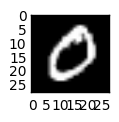

('the target is', 4)
[ 0.  0.  0.  0.  1.]


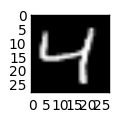

('the target is', 1)
[ 0.  1.  0.  0.  0.]


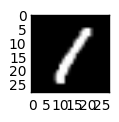

('the target is', 2)
[ 0.  0.  1.  0.  0.]


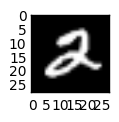

('the target is', 1)
[ 0.  1.  0.  0.  0.]


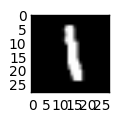

('the target is', 3)
[ 0.  0.  0.  1.  0.]


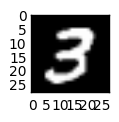

('the target is', 1)
[ 0.  1.  0.  0.  0.]


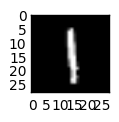

('the target is', 4)
[ 0.  0.  0.  0.  1.]


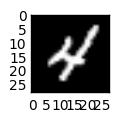

('the target is', 3)
[ 0.  0.  0.  1.  0.]


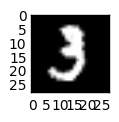

('the target is', 3)
[ 0.  0.  0.  1.  0.]


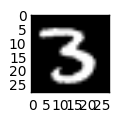

('the target is', 1)
[ 0.  1.  0.  0.  0.]


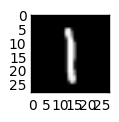

('the target is', 2)
[ 0.  0.  1.  0.  0.]


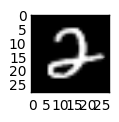

('the target is', 4)
[ 0.  0.  0.  0.  1.]


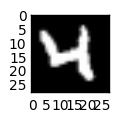

('the target is', 0)
[ 1.  0.  0.  0.  0.]


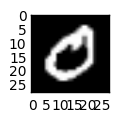

('the target is', 1)
[ 0.  1.  0.  0.  0.]


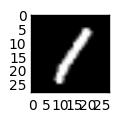

('the target is', 1)
[ 0.  1.  0.  0.  0.]


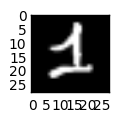

('the target is', 2)
[ 0.  0.  1.  0.  0.]


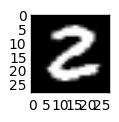

('the target is', 4)
[ 0.  0.  0.  0.  1.]


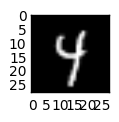

('the target is', 3)
[ 0.  0.  0.  1.  0.]


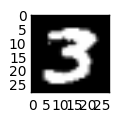

('the target is', 2)
[ 0.  0.  1.  0.  0.]


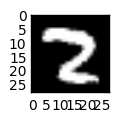

In [11]:
for inum in range( 20):
    plt.figure(figsize=(1,1))
    plt.imshow( train_data[inum,...], cmap='Greys_r' )
    print ("the target is",train_target[inum])
    print (train_target_N[inum])
    plt.show()

create a simple neural net to train on it

In [12]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Input, Reshape, Conv2D

In [13]:
activation='sigmoid'

In [14]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
simple = Model( i ,o )
simple.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [15]:
simple.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_1 (Reshape)              (None, 784)           0           input_1[0][0]                    
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1000)          785000      reshape_1[0][0]                  
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 5)             5005        dense_1[0][0]                    
Total params: 790,005
Trainable params: 790,005
Non-trainable params: 0
___________________

In [16]:
hist = simple.fit( train_data, train_target_N, nb_epoch=40, batch_size=100 ,verbose=1, validation_split=0.2)

Train on 24476 samples, validate on 6120 samples
Epoch 1/40
24476/24476 [==============================] - 100s - loss: 0.1508 - acc: 0.9564 - val_loss: 0.0854 - val_acc: 0.9768
Epoch 2/40
24476/24476 [==============================] - 0s - loss: 0.0895 - acc: 0.9739 - val_loss: 0.0754 - val_acc: 0.9783
Epoch 3/40
24476/24476 [==============================] - 0s - loss: 0.0780 - acc: 0.9779 - val_loss: 0.0674 - val_acc: 0.9814
Epoch 4/40
24476/24476 [==============================] - 0s - loss: 0.0737 - acc: 0.9791 - val_loss: 0.0673 - val_acc: 0.9797
Epoch 5/40
24476/24476 [==============================] - 0s - loss: 0.0680 - acc: 0.9805 - val_loss: 0.0610 - val_acc: 0.9835
Epoch 6/40
24476/24476 [==============================] - 0s - loss: 0.0664 - acc: 0.9806 - val_loss: 0.0659 - val_acc: 0.9814
Epoch 7/40
24476/24476 [==============================] - 0s - loss: 0.0607 - acc: 0.9821 - val_loss: 0.0562 - val_acc: 0.9835
Epoch 8/40
24476/24476 [==============================] - 0s

In [17]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    #plt.ylim(bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Error by Epoch')
    colors=[]
    do_acc=False
    for label,loss in histories:
        color = tuple(np.random.random(3))
        colors.append(color)
        l = label
        vl= label+" validation"
        if 'acc' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['acc'][-1])
            do_acc = True
        if 'val_acc' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_acc'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)


    plt.legend()
    plt.yscale('log')
    plt.show()
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    for i,(label,loss) in enumerate(histories):
        color = colors[i]
        if 'acc' in loss.history:
            plt.plot(loss.history['acc'], lw=2, label=label+" accuracy", color=color)
        if 'val_acc' in loss.history:
            plt.plot(loss.history['val_acc'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(loc='lower right')
    plt.show()

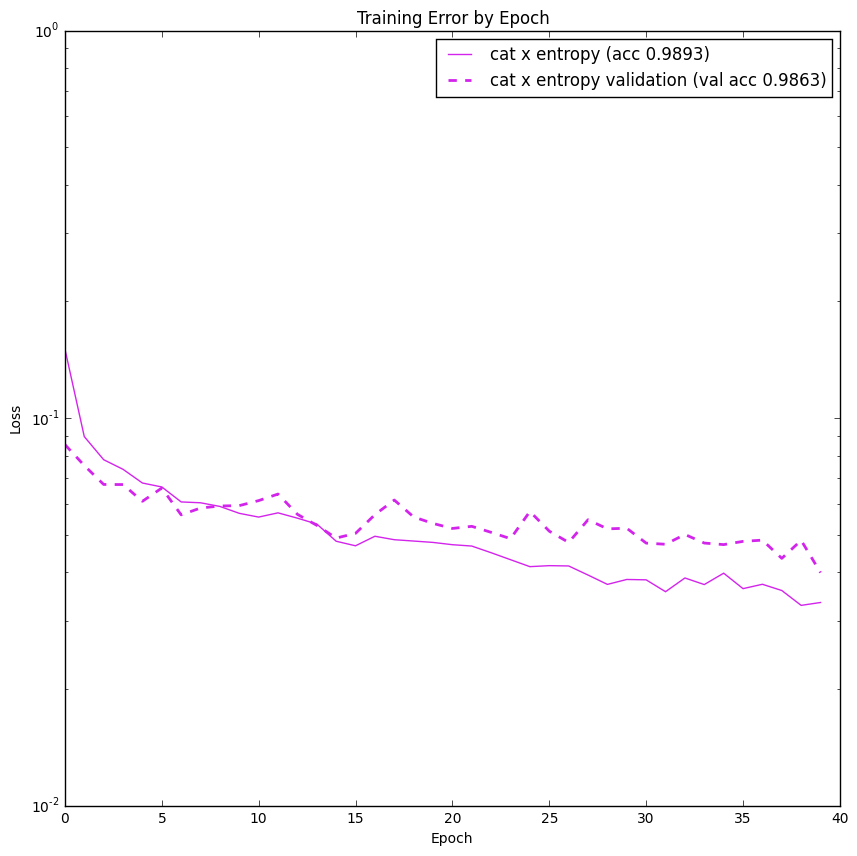

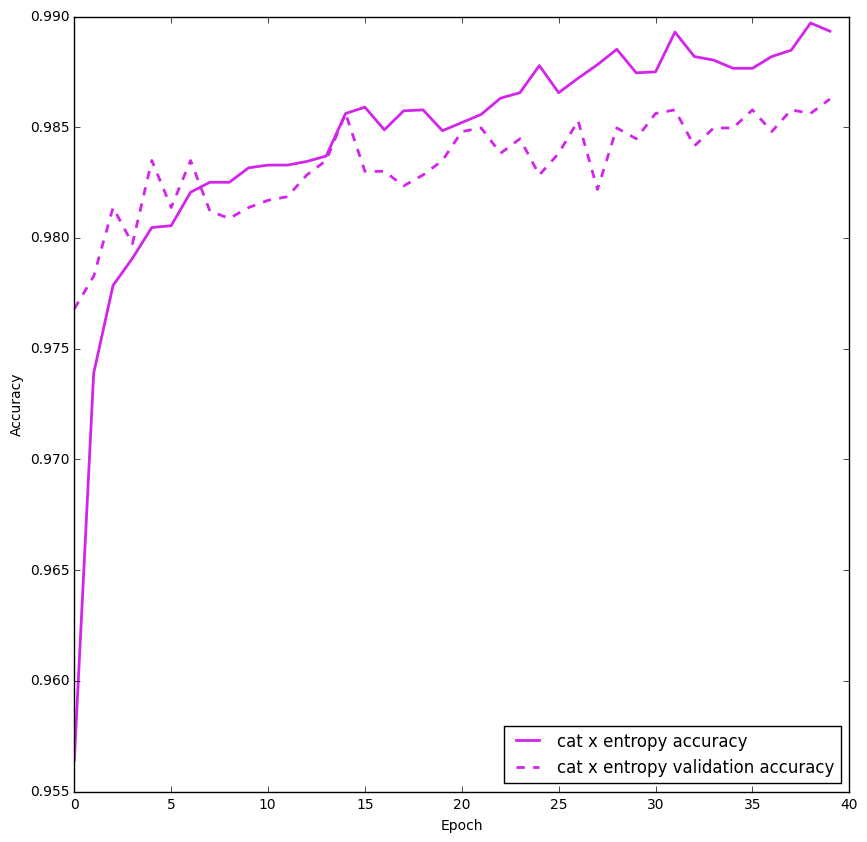

In [18]:
show_losses( [("cat x entropy", hist)])

Choose another loss function

In [19]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
simple_mse = Model( i ,o )
simple_mse.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [20]:
hist_mse = simple_mse.fit( train_data, train_target_N, nb_epoch=40, batch_size=100,verbose=1, validation_split=0.2 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/40
24476/24476 [==============================] - 0s - loss: 0.0151 - acc: 0.9552 - val_loss: 0.0084 - val_acc: 0.9770
Epoch 2/40
24476/24476 [==============================] - 0s - loss: 0.0091 - acc: 0.9742 - val_loss: 0.0075 - val_acc: 0.9796
Epoch 3/40
24476/24476 [==============================] - 0s - loss: 0.0082 - acc: 0.9768 - val_loss: 0.0073 - val_acc: 0.9792
Epoch 4/40
24476/24476 [==============================] - 0s - loss: 0.0080 - acc: 0.9772 - val_loss: 0.0074 - val_acc: 0.9786
Epoch 5/40
24476/24476 [==============================] - 0s - loss: 0.0074 - acc: 0.9783 - val_loss: 0.0070 - val_acc: 0.9802
Epoch 6/40
24476/24476 [==============================] - 0s - loss: 0.0071 - acc: 0.9799 - val_loss: 0.0066 - val_acc: 0.9802
Epoch 7/40
24476/24476 [==============================] - 0s - loss: 0.0067 - acc: 0.9805 - val_loss: 0.0065 - val_acc: 0.9809
Epoch 8/40
24476/24476 [==============================] - 0s -

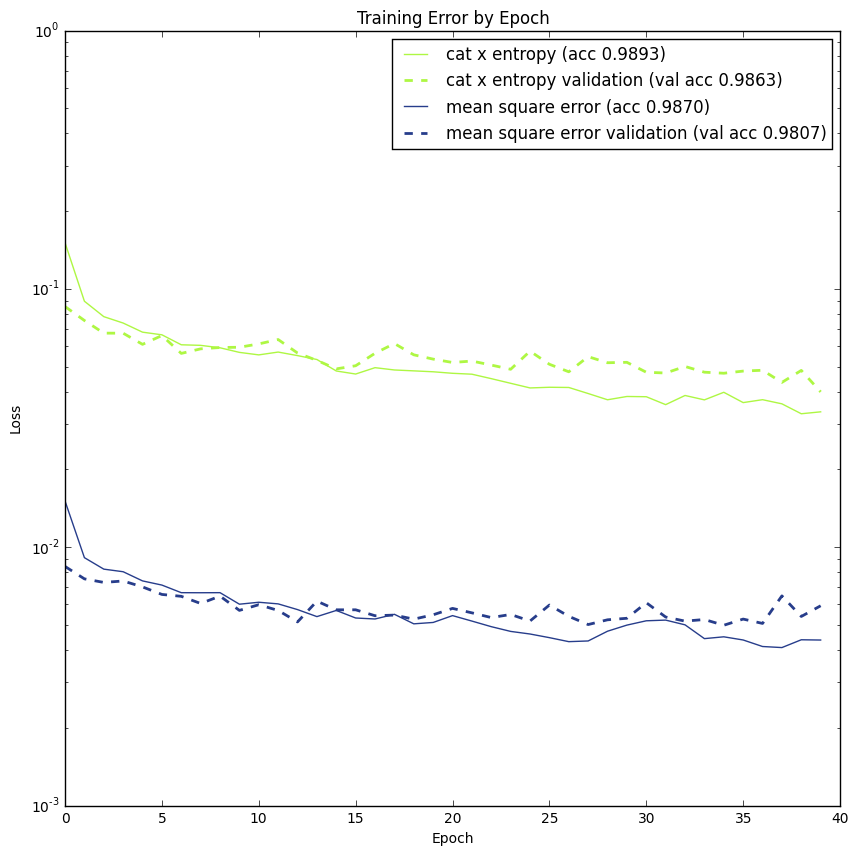

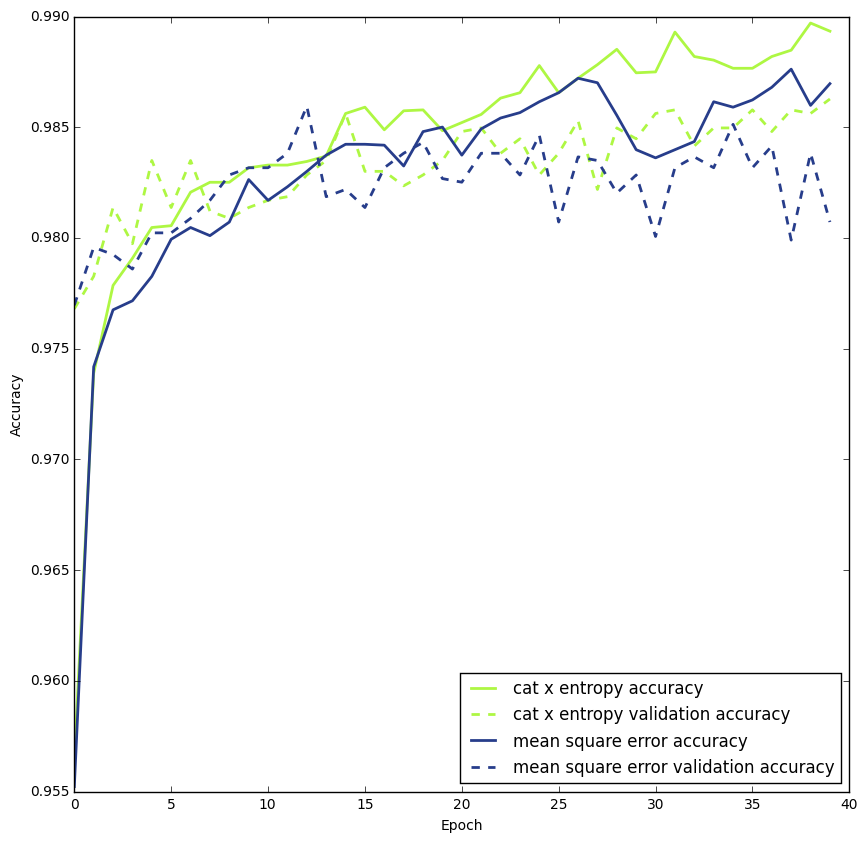

In [21]:
show_losses( [("cat x entropy", hist), ("mean square error", hist_mse)] )

Loss cannot be compared numerically. Accuracy is not as good, since the MSE is not adapted for the classification problem

Where to stop the training? for how long should it run ?

Add a method to stop training when validation is getting worse

In [22]:
from keras.callbacks import EarlyStopping

add a callback function for checkpointing

In [23]:
from keras.callbacks import ModelCheckpoint

In [24]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
simple = Model( i ,o )
simple.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [25]:
hist = simple.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='simple.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 1s - loss: 0.1501 - acc: 0.9561 - val_loss: 0.0882 - val_acc: 0.9760
Epoch 2/1000
24476/24476 [==============================] - 0s - loss: 0.0914 - acc: 0.9745 - val_loss: 0.0796 - val_acc: 0.9797
Epoch 3/1000
24476/24476 [==============================] - 0s - loss: 0.0828 - acc: 0.9768 - val_loss: 0.0747 - val_acc: 0.9792
Epoch 4/1000
24476/24476 [==============================] - 0s - loss: 0.0785 - acc: 0.9772 - val_loss: 0.0696 - val_acc: 0.9819
Epoch 5/1000
24476/24476 [==============================] - ETA: 0s - loss: 0.0748 - acc: 0.978 - 0s - loss: 0.0743 - acc: 0.9789 - val_loss: 0.0671 - val_acc: 0.9807
Epoch 6/1000
24476/24476 [==============================] - 0s - loss: 0.0693 - acc: 0.9802 - val_loss: 0.0623 - val_acc: 0.9830
Epoch 7/1000
24476/24476 [==============================] - ETA: 0s - loss: 0.0622 - acc: 0.982 - 0s - loss: 0.0623 - acc: 0.9820 - val_los

In [26]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
simple_mse = Model( i ,o )
simple_mse.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [27]:
hist_mse = simple_mse.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='simple_mse.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 0s - loss: 0.0150 - acc: 0.9546 - val_loss: 0.0085 - val_acc: 0.9776
Epoch 2/1000
24476/24476 [==============================] - 0s - loss: 0.0095 - acc: 0.9734 - val_loss: 0.0085 - val_acc: 0.9765
Epoch 3/1000
24476/24476 [==============================] - 0s - loss: 0.0084 - acc: 0.9759 - val_loss: 0.0075 - val_acc: 0.9796
Epoch 4/1000
24476/24476 [==============================] - 0s - loss: 0.0077 - acc: 0.9783 - val_loss: 0.0068 - val_acc: 0.9817
Epoch 5/1000
24476/24476 [==============================] - 0s - loss: 0.0073 - acc: 0.9786 - val_loss: 0.0062 - val_acc: 0.9819
Epoch 6/1000
24476/24476 [==============================] - 0s - loss: 0.0067 - acc: 0.9800 - val_loss: 0.0063 - val_acc: 0.9802
Epoch 7/1000
24476/24476 [==============================] - 0s - loss: 0.0068 - acc: 0.9806 - val_loss: 0.0067 - val_acc: 0.9792
Epoch 8/1000
24476/24476 [======================

plot the training and validation losses

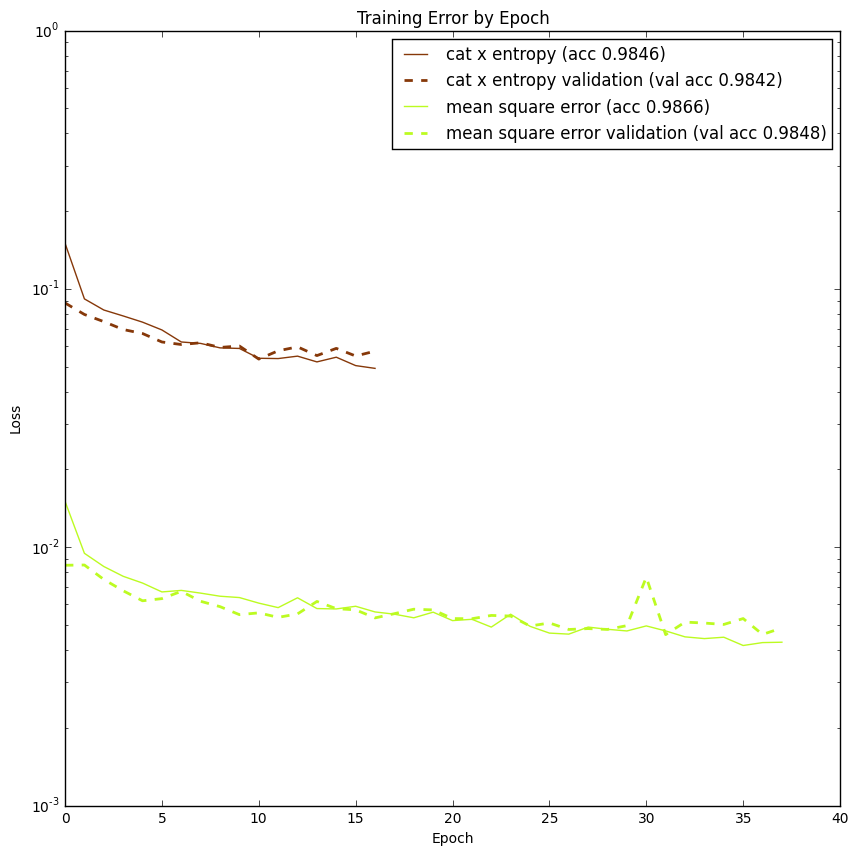

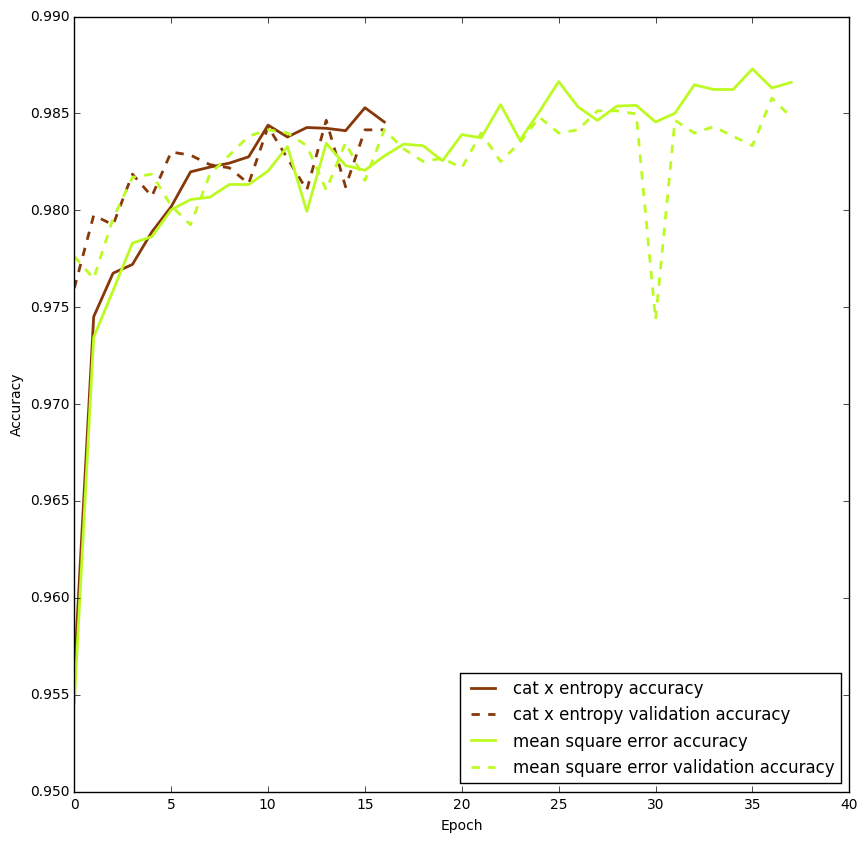

In [28]:
show_losses( [("cat x entropy", hist), ("mean square error", hist_mse)] )

So which of the two models is perfoming better ?

Let's calculate accuracy 

In [29]:
def accuracy( p ):
    p_cat = np.argmax(p,axis=1)
    print "Fraction of good prediction"
    print len(np.where( p_cat == test_target)[0])
    print len(np.where( p_cat == test_target )[0])/float(len(p_cat)),"%"


In [30]:
accuracy( simple.predict(test_data) )

Fraction of good prediction
5066
0.985794901732 %


In [31]:
accuracy( simple_mse.predict(test_data) )

Fraction of good prediction
5084
0.989297528702 %


Let's keep a deeper network

In [32]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation)(l)
l = Dense(1000, activation=activation)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
deeper = Model( i ,o )
deeper.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [33]:
deeper.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_5 (Reshape)              (None, 784)           0           input_5[0][0]                    
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 1000)          785000      reshape_5[0][0]                  
____________________________________________________________________________________________________
dense_10 (Dense)                 (None, 1000)          1001000     dense_9[0][0]                    
___________________________________________________________________________________________

In [34]:
hist_deep = deeper.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='deeper.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 1s - loss: 0.1654 - acc: 0.9487 - val_loss: 0.0786 - val_acc: 0.9776
Epoch 2/1000
24476/24476 [==============================] - ETA: 0s - loss: 0.0941 - acc: 0.971 - 1s - loss: 0.0936 - acc: 0.9715 - val_loss: 0.1001 - val_acc: 0.9685
Epoch 3/1000
24476/24476 [==============================] - 1s - loss: 0.0876 - acc: 0.9736 - val_loss: 0.0692 - val_acc: 0.9786
Epoch 4/1000
24476/24476 [==============================] - 1s - loss: 0.0811 - acc: 0.9753 - val_loss: 0.0834 - val_acc: 0.9745
Epoch 5/1000
24476/24476 [==============================] - 1s - loss: 0.0847 - acc: 0.9739 - val_loss: 0.0583 - val_acc: 0.9817
Epoch 6/1000
24476/24476 [==============================] - ETA: 0s - loss: 0.0752 - acc: 0.977 - 1s - loss: 0.0756 - acc: 0.9774 - val_loss: 0.0635 - val_acc: 0.9812
Epoch 7/1000
24476/24476 [==============================] - ETA: 0s - loss: 0.0737 - acc: 0.977 - 1s 

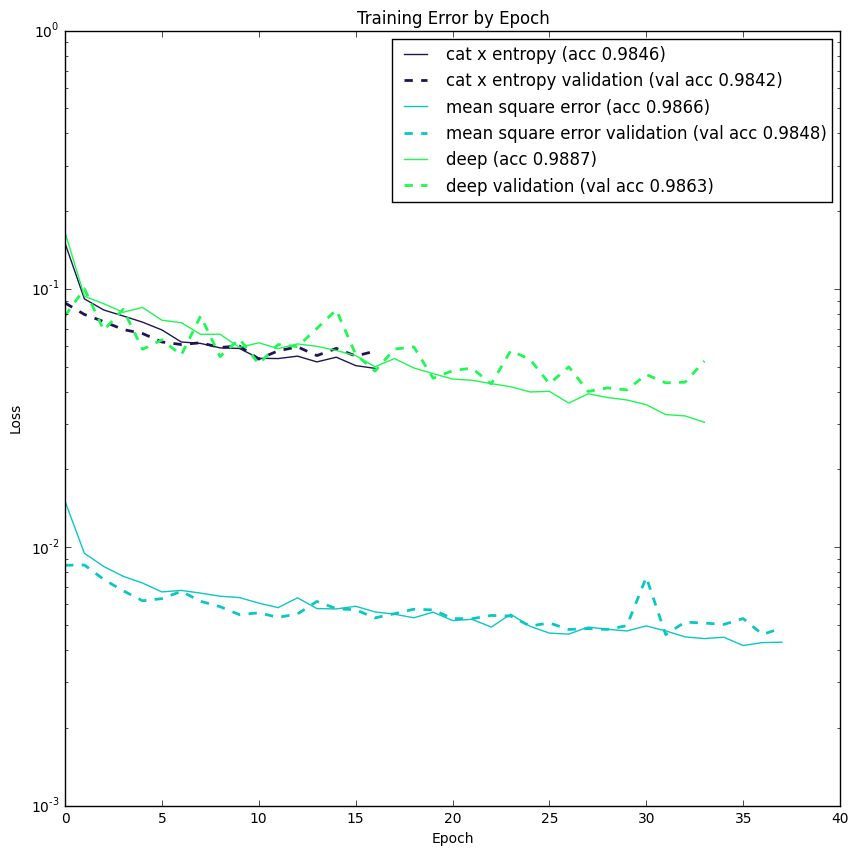

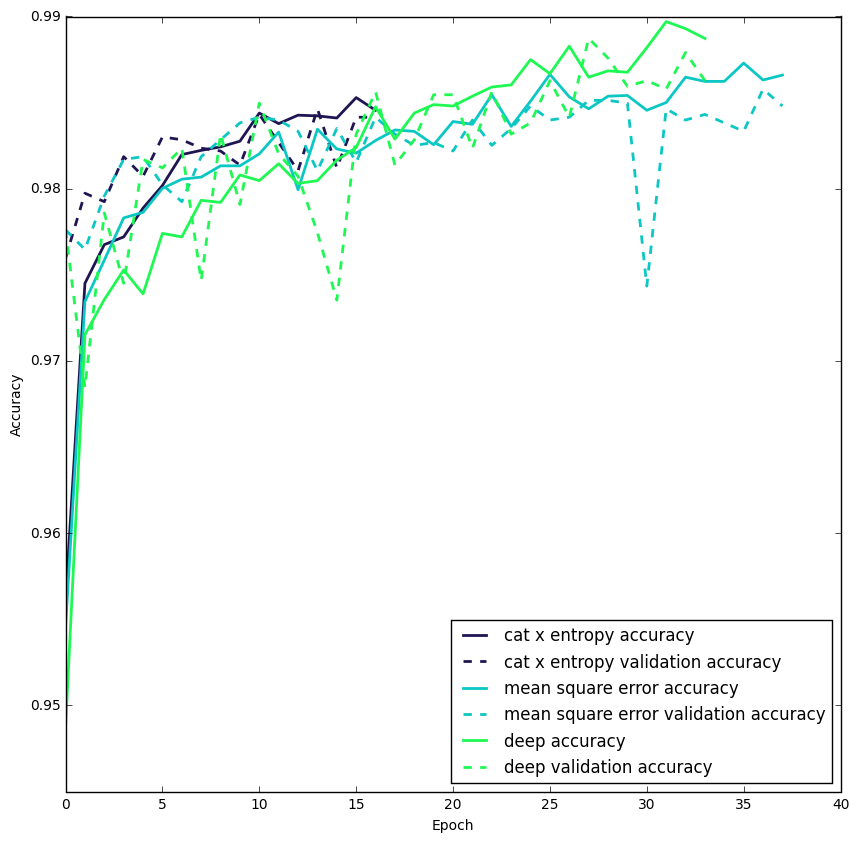

In [35]:
show_losses( [("cat x entropy", hist), ("mean square error", hist_mse), ("deep", hist_deep)] )

A second layer made it harder to train, and does not provided an priori better performance in the end

In [36]:
accuracy( deeper.predict(test_data) )

Fraction of good prediction
5060
0.984627359408 %


In [37]:
from keras.layers import Dropout

In [38]:
i = Input((28,28,))
l = Reshape( (28*28,))(i)
l = Dense(1000, activation=activation, )(l)
l = Dropout(0.5)(l)
l = Dense(1000, activation=activation)(l)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
deeper_dout = Model( i ,o )
deeper_dout.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [39]:
hist_deepout = deeper_dout.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='deeper_dout.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 1s - loss: 0.2337 - acc: 0.9234 - val_loss: 0.0968 - val_acc: 0.9686
Epoch 2/1000
24476/24476 [==============================] - 1s - loss: 0.1495 - acc: 0.9545 - val_loss: 0.0859 - val_acc: 0.9757
Epoch 3/1000
24476/24476 [==============================] - 1s - loss: 0.1433 - acc: 0.9531 - val_loss: 0.0835 - val_acc: 0.9745
Epoch 4/1000
24476/24476 [==============================] - 1s - loss: 0.1327 - acc: 0.9583 - val_loss: 0.0781 - val_acc: 0.9771
Epoch 5/1000
24476/24476 [==============================] - 1s - loss: 0.1284 - acc: 0.9590 - val_loss: 0.0754 - val_acc: 0.9768
Epoch 6/1000
24476/24476 [==============================] - 1s - loss: 0.1286 - acc: 0.9588 - val_loss: 0.0656 - val_acc: 0.9804
Epoch 7/1000
24476/24476 [==============================] - 1s - loss: 0.1128 - acc: 0.9638 - val_loss: 0.0749 - val_acc: 0.9768
Epoch 8/1000
24476/24476 [======================

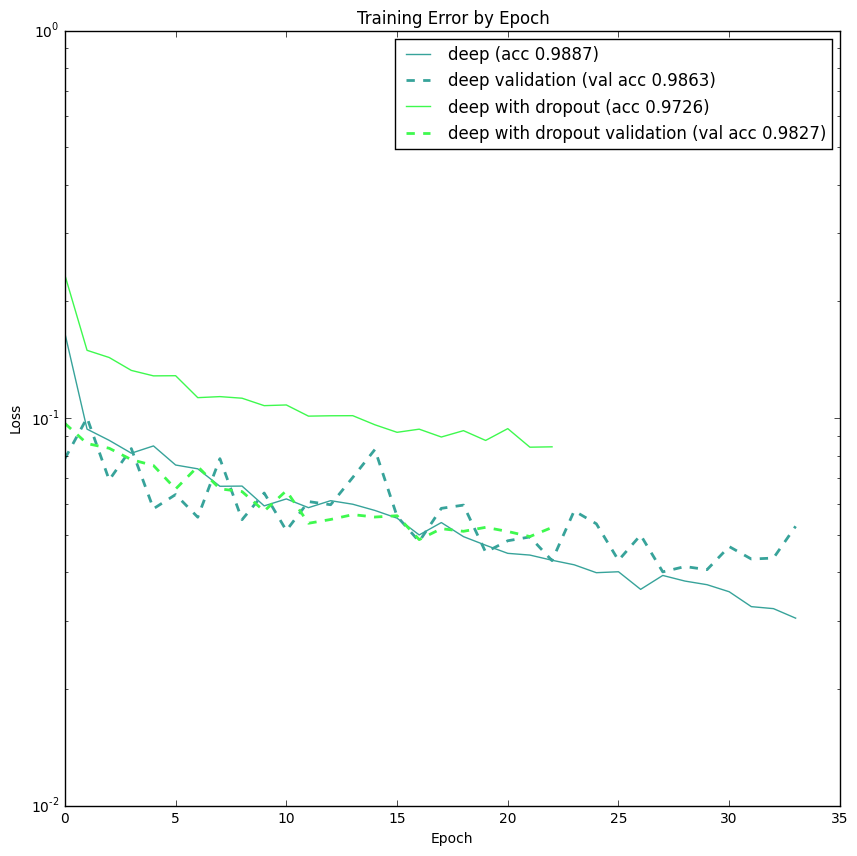

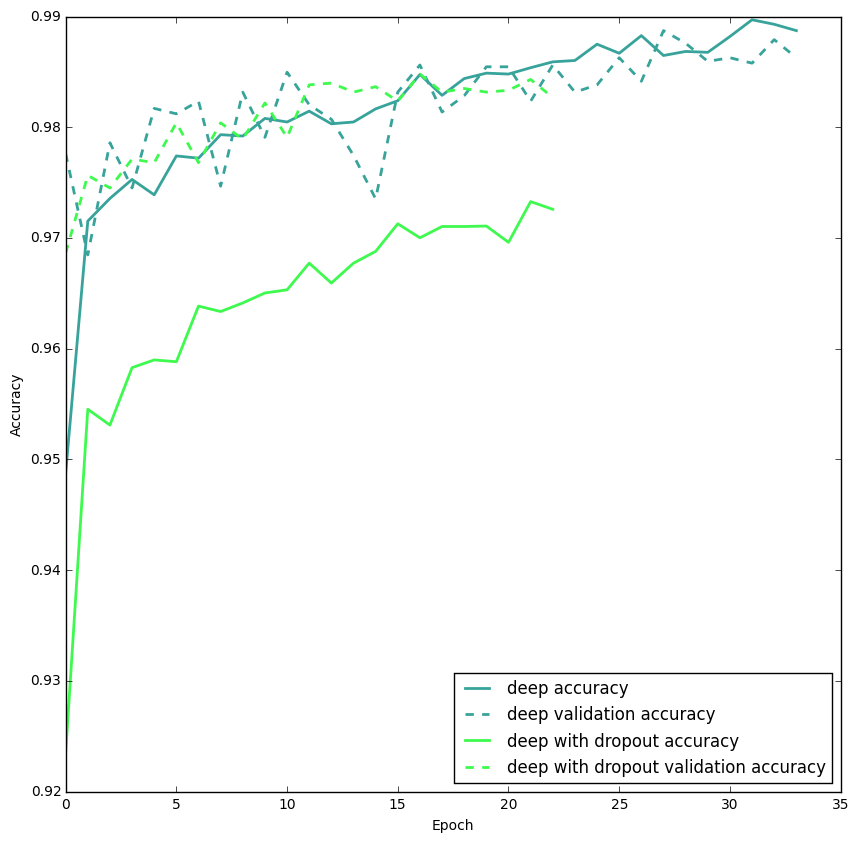

In [40]:
show_losses( [("deep", hist_deep), ("deep with dropout", hist_deepout)] )

In [41]:
accuracy( deeper_dout.predict(test_data) )

Fraction of good prediction
5063
0.98521113057 %


Difference between the train and validation loss/acc is because of nodes being dropped out during training, but not during validation

In [42]:
from keras.layers import Convolution2D, Flatten, MaxPooling2D

In [43]:
i = Input((28,28,))
l = Reshape( (28,28,1))(i)
l = Convolution2D(10, 4, 4, activation=activation, )(l)
l = MaxPooling2D()(l)
l = Flatten()(l)
l = Dense(1000, activation=activation)(l)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
cnn_4 = Model( i ,o )
cnn_4.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [44]:
cnn_4.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_7 (Reshape)              (None, 28, 28, 1)     0           input_7[0][0]                    
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 25, 25, 10)    170         reshape_7[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 12, 12, 10)    0           convolution2d_1[0][0]            
___________________________________________________________________________________________

Note that all parameters are in the dense part of the neural net

In [45]:
hist_cnn_4 = cnn_4.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='cnn_4.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 2s - loss: 0.2579 - acc: 0.9154 - val_loss: 0.0975 - val_acc: 0.9709
Epoch 2/1000
24476/24476 [==============================] - 1s - loss: 0.0821 - acc: 0.9754 - val_loss: 0.0496 - val_acc: 0.9868
Epoch 3/1000
24476/24476 [==============================] - 1s - loss: 0.0557 - acc: 0.9826 - val_loss: 0.0359 - val_acc: 0.9882
Epoch 4/1000
24476/24476 [==============================] - 1s - loss: 0.0442 - acc: 0.9864 - val_loss: 0.0330 - val_acc: 0.9887
Epoch 5/1000
24476/24476 [==============================] - 1s - loss: 0.0340 - acc: 0.9901 - val_loss: 0.0378 - val_acc: 0.9871
Epoch 6/1000
24476/24476 [==============================] - 1s - loss: 0.0281 - acc: 0.9914 - val_loss: 0.0297 - val_acc: 0.9895
Epoch 7/1000
24476/24476 [==============================] - ETA: 0s - loss: 0.0263 - acc: 0.991 - 1s - loss: 0.0265 - acc: 0.9919 - val_loss: 0.0255 - val_acc: 0.9912
Epoch 8/10

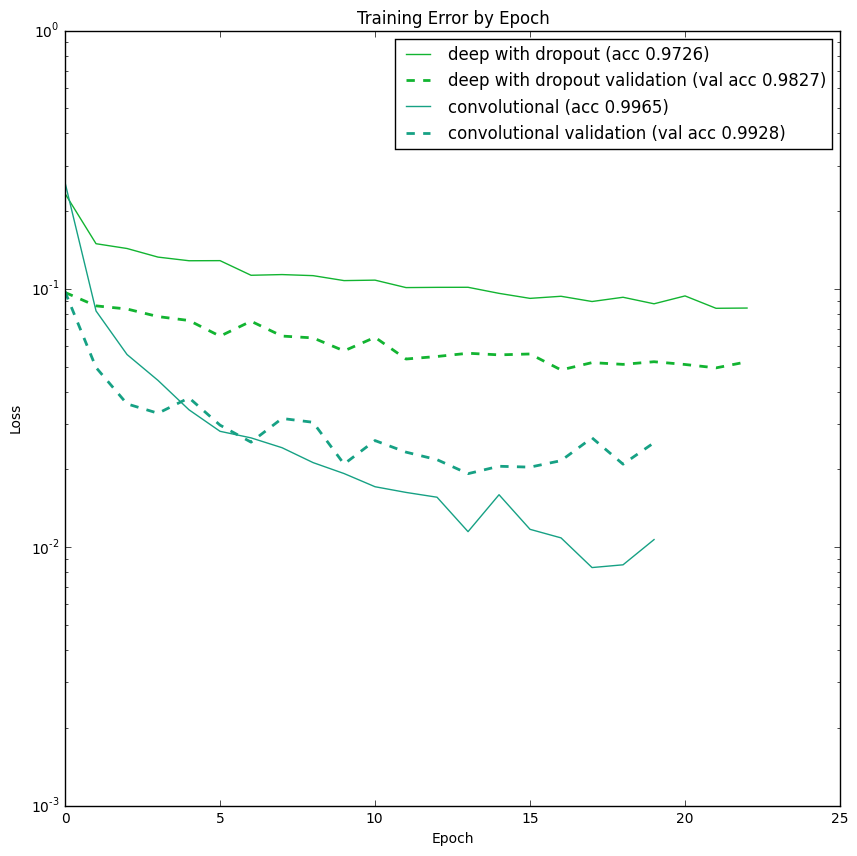

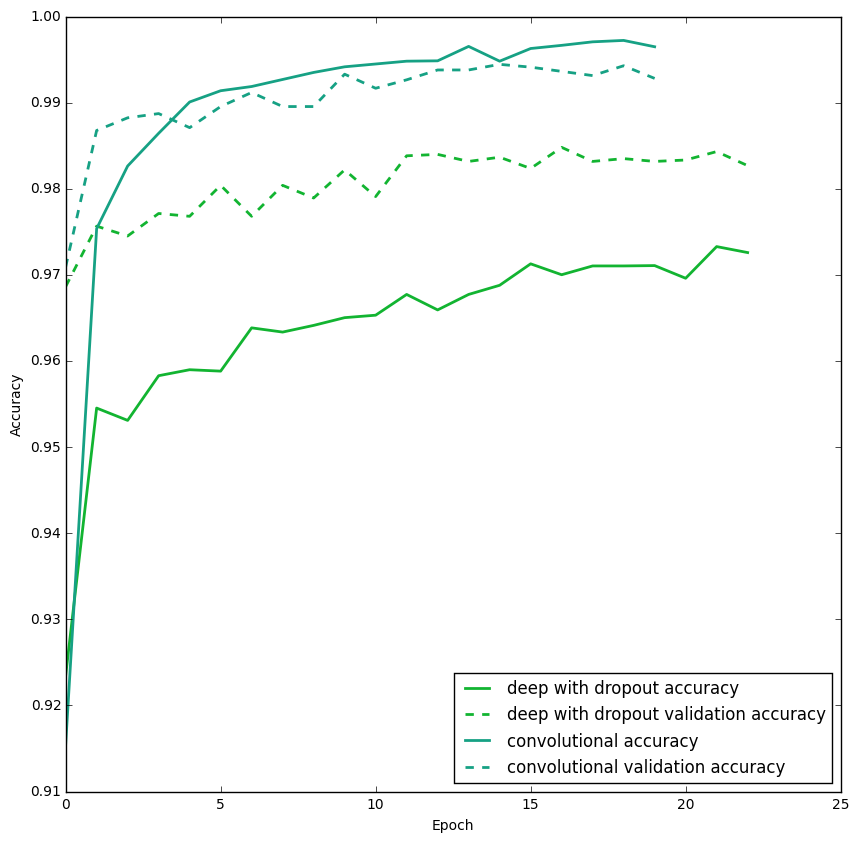

In [46]:
show_losses( [#("mean square error", hist_mse),
              #("deep", hist_deep),
              ("deep with dropout", hist_deepout),
              ("convolutional", hist_cnn_4)] )

Convolutional approach is clearly much better on the problem and the sample we have

In [47]:
accuracy( cnn_4.predict(test_data) )

Fraction of good prediction
5114
0.995135240319 %


In [48]:
i = Input((28,28,))
l = Reshape( (28,28,1))(i)
l = Convolution2D(10, 3, 3, activation=activation, )(l)
l = MaxPooling2D()(l)
l = Flatten()(l)
l = Dense(1000, activation=activation)(l)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
cnn_3 = Model( i ,o )
cnn_3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [49]:
cnn_3.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_8 (Reshape)              (None, 28, 28, 1)     0           input_8[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 26, 26, 10)    100         reshape_8[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 13, 13, 10)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [50]:
hist_cnn_3 = cnn_3.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='cnn_3.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 1s - loss: 0.2608 - acc: 0.9160 - val_loss: 0.0746 - val_acc: 0.9784
Epoch 2/1000
24476/24476 [==============================] - ETA: 0s - loss: 0.0870 - acc: 0.973 - 1s - loss: 0.0868 - acc: 0.9737 - val_loss: 0.0492 - val_acc: 0.9853
Epoch 3/1000
24476/24476 [==============================] - 1s - loss: 0.0662 - acc: 0.9796 - val_loss: 0.0408 - val_acc: 0.9876
Epoch 4/1000
24476/24476 [==============================] - 1s - loss: 0.0503 - acc: 0.9852 - val_loss: 0.0321 - val_acc: 0.9912
Epoch 5/1000
24476/24476 [==============================] - ETA: 0s - loss: 0.0466 - acc: 0.985 - 1s - loss: 0.0466 - acc: 0.9852 - val_loss: 0.0338 - val_acc: 0.9900
Epoch 6/1000
24476/24476 [==============================] - 1s - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0324 - val_acc: 0.9902
Epoch 7/1000
24476/24476 [==============================] - 1s - loss: 0.0365 - acc: 0.9879 - val_los

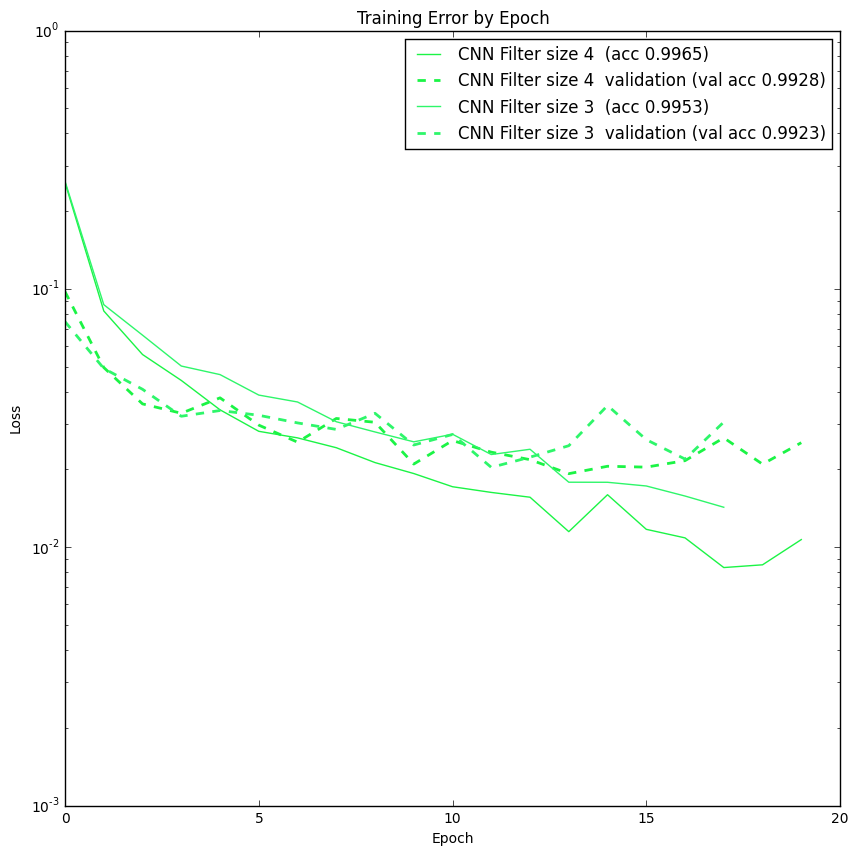

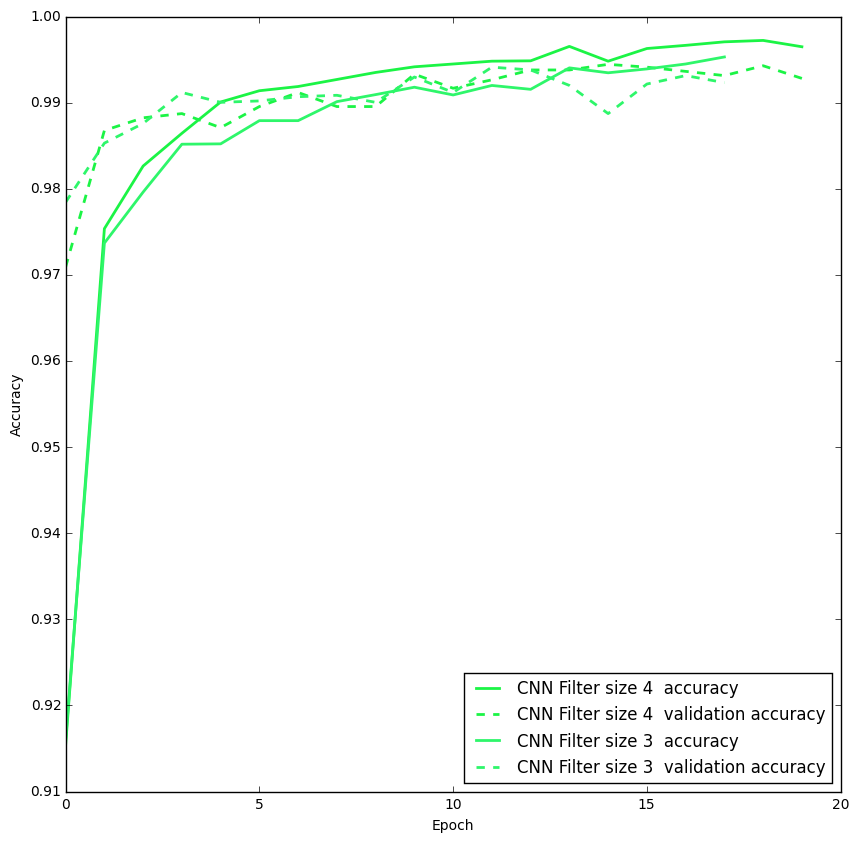

In [51]:
show_losses( [#("mean square error", hist_mse),
              #("deep", hist_deep),
              #("deep with dropout", hist_deepout),
              ("CNN Filter size 4 ", hist_cnn_4),
              ("CNN Filter size 3 ", hist_cnn_3),
] )

In [52]:
i = Input((28,28,))
l = Reshape( (28,28,1))(i)
l = Convolution2D(10, 5, 5, activation=activation, )(l)
l = MaxPooling2D()(l)
l = Flatten()(l)
l = Dense(1000, activation=activation)(l)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
cnn_5 = Model( i ,o )
cnn_5.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [53]:
hist_cnn_5 = cnn_5.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='cnn_5.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 1s - loss: 0.2560 - acc: 0.9193 - val_loss: 0.0764 - val_acc: 0.9781
Epoch 2/1000
24476/24476 [==============================] - 1s - loss: 0.0850 - acc: 0.9749 - val_loss: 0.0468 - val_acc: 0.9868
Epoch 3/1000
24476/24476 [==============================] - 1s - loss: 0.0585 - acc: 0.9821 - val_loss: 0.0381 - val_acc: 0.9887
Epoch 4/1000
24476/24476 [==============================] - 1s - loss: 0.0479 - acc: 0.9851 - val_loss: 0.0336 - val_acc: 0.9897
Epoch 5/1000
24476/24476 [==============================] - 1s - loss: 0.0425 - acc: 0.9864 - val_loss: 0.0296 - val_acc: 0.9899
Epoch 6/1000
24476/24476 [==============================] - 1s - loss: 0.0380 - acc: 0.9878 - val_loss: 0.0255 - val_acc: 0.9908
Epoch 7/1000
24476/24476 [==============================] - 1s - loss: 0.0327 - acc: 0.9899 - val_loss: 0.0288 - val_acc: 0.9897
Epoch 8/1000
24476/24476 [======================

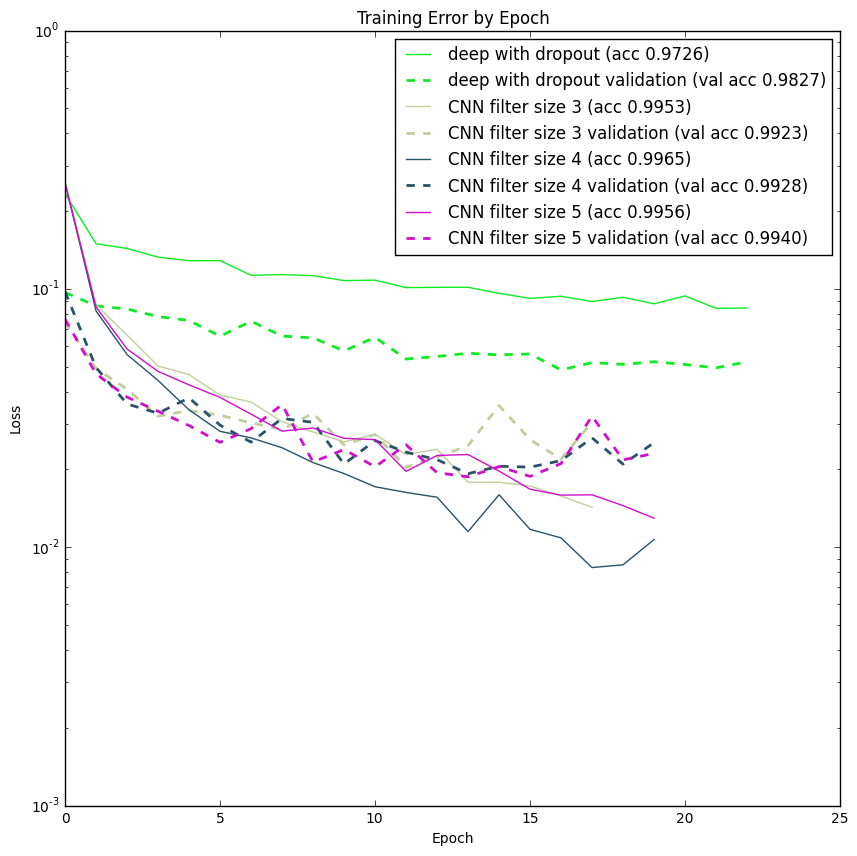

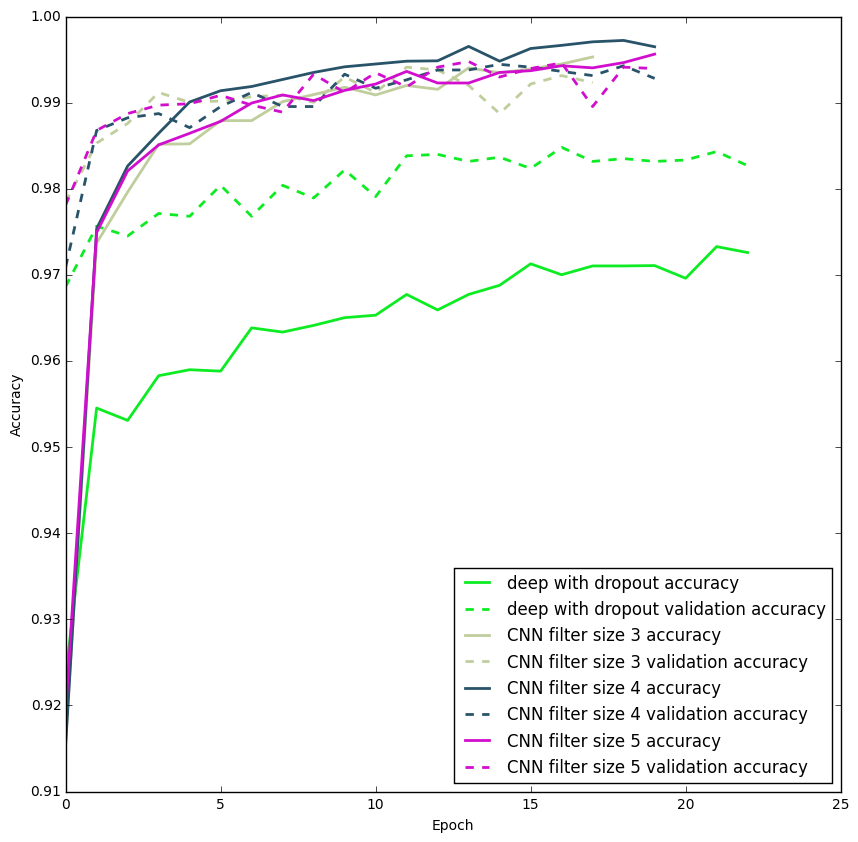

In [54]:
show_losses( [
              #("deep", hist_deep),
        ("deep with dropout", hist_deepout),
                ("CNN filter size 3", hist_cnn_3),
              ("CNN filter size 4", hist_cnn_4),
               ("CNN filter size 5", hist_cnn_5)
            ] )

In [55]:
accuracy( cnn_3.predict(test_data) )
accuracy( cnn_4.predict(test_data) )
accuracy( cnn_5.predict(test_data) )

Fraction of good prediction
5111
0.994551469157 %
Fraction of good prediction
5114
0.995135240319 %
Fraction of good prediction
5116
0.995524421094 %


In [56]:
from keras.layers import Merge, merge

# Let's combine filters of size 3, 4 and 5

In [57]:
i = Input((28,28,))
r = Reshape( (28,28,1))(i)
branches=[]
for s in range(3,6):
    l = Convolution2D(10, s, s, activation=activation, )(r)
    l = MaxPooling2D()(l)
    branches.append( Flatten()(l) )

m = merge(branches, mode='concat')
l = Dense(1000, activation=activation)(m)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
bcnn = Model( i ,o )
bcnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [58]:
bcnn.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_10 (InputLayer)            (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_10 (Reshape)             (None, 28, 28, 1)     0           input_10[0][0]                   
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 26, 26, 10)    100         reshape_10[0][0]                 
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 25, 25, 10)    170         reshape_10[0][0]                 
___________________________________________________________________________________________

In [59]:
hist_bcnn =bcnn.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='bcnn.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 3s - loss: 0.2618 - acc: 0.9225 - val_loss: 0.0685 - val_acc: 0.9809
Epoch 2/1000
24476/24476 [==============================] - 2s - loss: 0.0775 - acc: 0.9762 - val_loss: 0.0449 - val_acc: 0.9877
Epoch 3/1000
24476/24476 [==============================] - 2s - loss: 0.0584 - acc: 0.9824 - val_loss: 0.0414 - val_acc: 0.9894
Epoch 4/1000
24476/24476 [==============================] - 2s - loss: 0.0478 - acc: 0.9857 - val_loss: 0.0322 - val_acc: 0.9902
Epoch 5/1000
24476/24476 [==============================] - 2s - loss: 0.0415 - acc: 0.9881 - val_loss: 0.0279 - val_acc: 0.9931
Epoch 6/1000
24476/24476 [==============================] - ETA: 0s - loss: 0.0407 - acc: 0.988 - 2s - loss: 0.0408 - acc: 0.9880 - val_loss: 0.0263 - val_acc: 0.9920
Epoch 7/1000
24476/24476 [==============================] - 2s - loss: 0.0389 - acc: 0.9881 - val_loss: 0.0264 - val_acc: 0.9918
Epoch 8/10

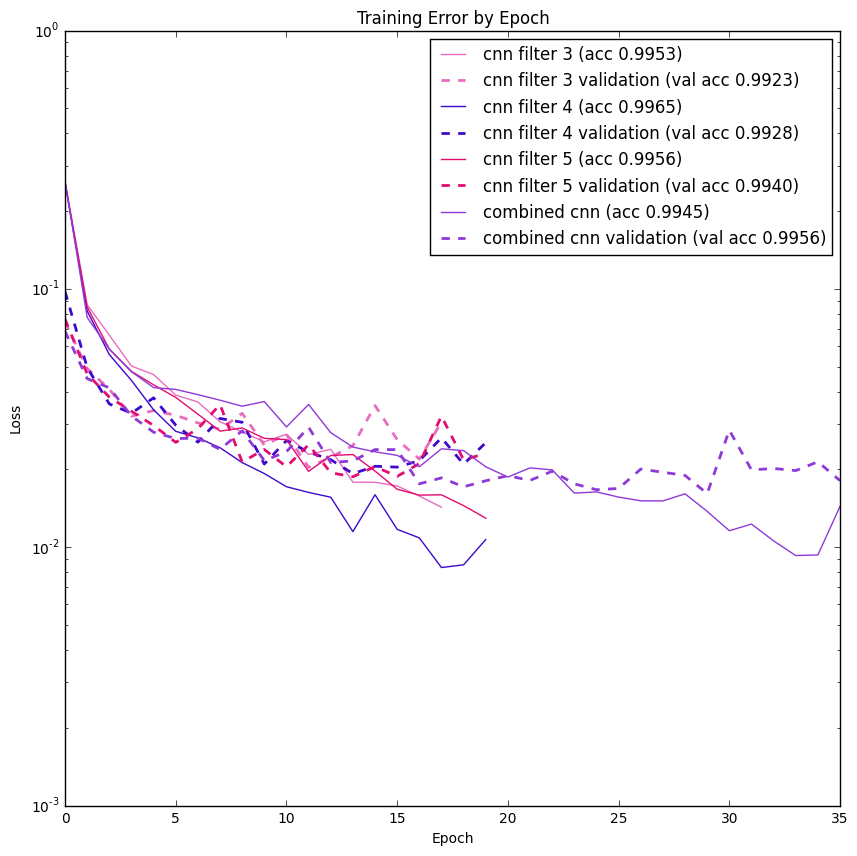

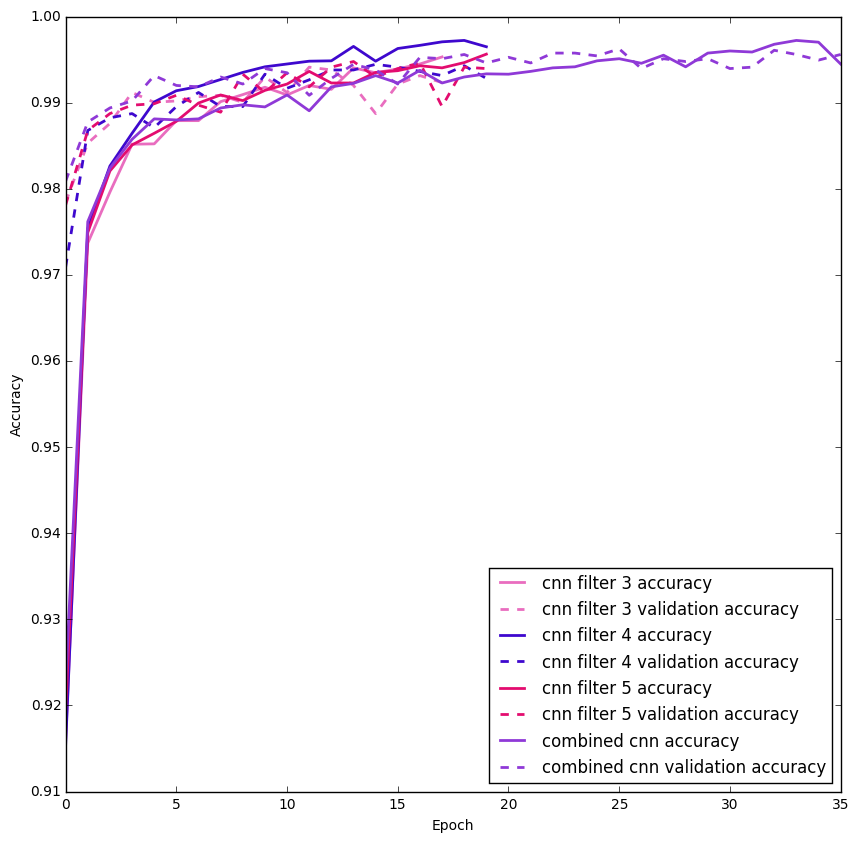

In [60]:
show_losses( [
              #("deep with dropout", hist_deepout),
                ("cnn filter 3", hist_cnn_3),
              ("cnn filter 4", hist_cnn_4),
               ("cnn filter 5", hist_cnn_5),
             ("combined cnn", hist_bcnn)
            ] )

The combined does not over-perform significantly. Note that the branched model has 5M parameters, all concentrated on the dense part of the model, while the others have <2M

In [61]:
accuracy( bcnn.predict(test_data) )


Fraction of good prediction
5129
0.998054096128 %


Adding a regularizer to constrain the weights on the dense layer

In [62]:
from keras import regularizers

In [63]:
i = Input((28,28,))
r = Reshape( (28,28,1))(i)
branches=[]
for s in range(3,6):
    l = Convolution2D(10, s, s, activation=activation)(r)
    l = MaxPooling2D()(l)
    branches.append( Flatten()(l) )

m = merge(branches, mode='concat')
l = Dense(1000, activation=activation)(m)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax', W_regularizer=regularizers.l2(0.1))(l)
brcnn = Model( i ,o )
brcnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [64]:
brcnn.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_11 (InputLayer)            (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_11 (Reshape)             (None, 28, 28, 1)     0           input_11[0][0]                   
____________________________________________________________________________________________________
convolution2d_7 (Convolution2D)  (None, 26, 26, 10)    100         reshape_11[0][0]                 
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 25, 25, 10)    170         reshape_11[0][0]                 
___________________________________________________________________________________________

In [65]:
hist_brcnn =brcnn.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='brcnn.h5', verbose=0)]
                 )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 3s - loss: 0.5723 - acc: 0.9040 - val_loss: 0.2476 - val_acc: 0.9773
Epoch 2/1000
24476/24476 [==============================] - 2s - loss: 0.2336 - acc: 0.9740 - val_loss: 0.1968 - val_acc: 0.9799
Epoch 3/1000
24476/24476 [==============================] - 2s - loss: 0.1903 - acc: 0.9822 - val_loss: 0.1697 - val_acc: 0.9877
Epoch 4/1000
24476/24476 [==============================] - ETA: 0s - loss: 0.1709 - acc: 0.986 - 2s - loss: 0.1709 - acc: 0.9865 - val_loss: 0.1587 - val_acc: 0.9879
Epoch 5/1000
24476/24476 [==============================] - 2s - loss: 0.1605 - acc: 0.9889 - val_loss: 0.1503 - val_acc: 0.9900
Epoch 6/1000
24476/24476 [==============================] - 2s - loss: 0.1524 - acc: 0.9902 - val_loss: 0.1435 - val_acc: 0.9918
Epoch 7/1000
24476/24476 [==============================] - 2s - loss: 0.1460 - acc: 0.9922 - val_loss: 0.1391 - val_acc: 0.9915
Epoch 8/10

24476/24476 [==============================] - 2s - loss: 0.0763 - acc: 0.9999 - val_loss: 0.0890 - val_acc: 0.9949
Epoch 63/1000
24476/24476 [==============================] - 2s - loss: 0.0758 - acc: 0.9998 - val_loss: 0.0898 - val_acc: 0.9954
Epoch 64/1000
24476/24476 [==============================] - 2s - loss: 0.0757 - acc: 0.9999 - val_loss: 0.0890 - val_acc: 0.9948
Epoch 65/1000
24476/24476 [==============================] - 2s - loss: 0.0756 - acc: 0.9999 - val_loss: 0.0882 - val_acc: 0.9946
Epoch 66/1000
24476/24476 [==============================] - 2s - loss: 0.0752 - acc: 0.9998 - val_loss: 0.0879 - val_acc: 0.9954
Epoch 67/1000
24476/24476 [==============================] - 2s - loss: 0.0750 - acc: 0.9998 - val_loss: 0.0917 - val_acc: 0.9948
Epoch 68/1000
24476/24476 [==============================] - 2s - loss: 0.0749 - acc: 0.9998 - val_loss: 0.0883 - val_acc: 0.9958
Epoch 69/1000
24476/24476 [==============================] - 2s - loss: 0.0745 - acc: 0.9998 - val_loss:

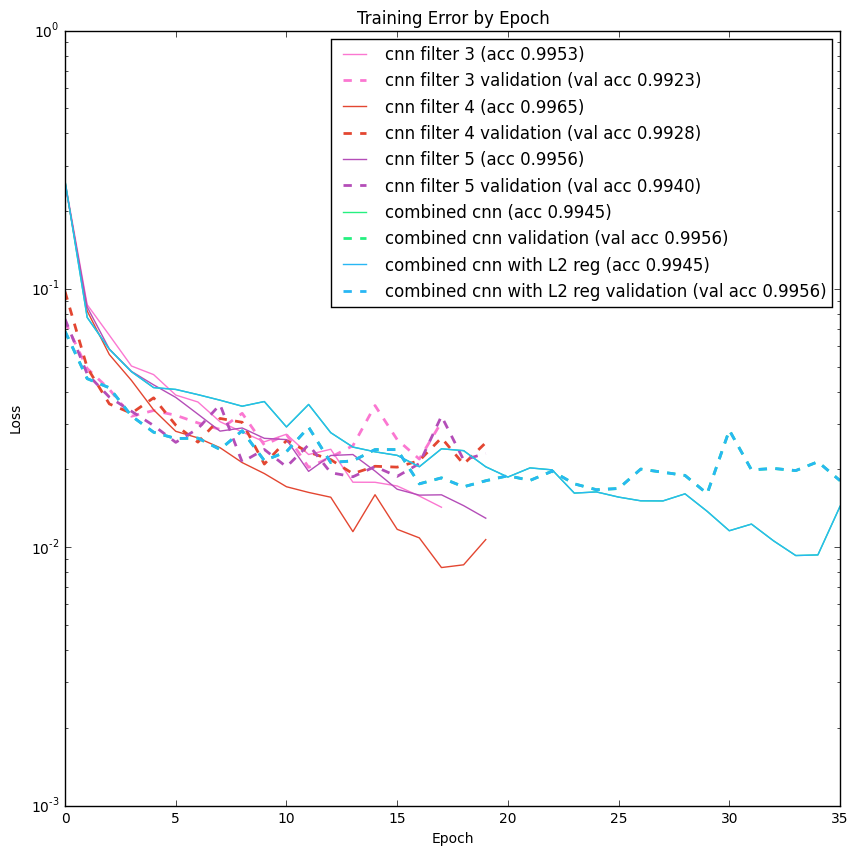

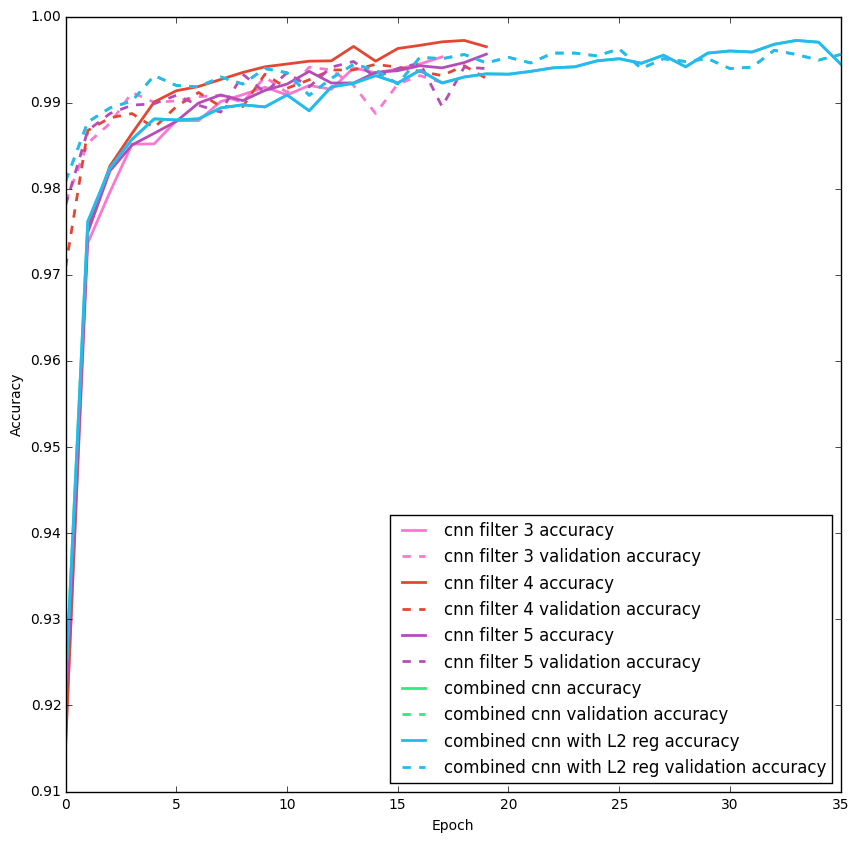

In [66]:
show_losses( [
              #("deep with dropout", hist_deepout),
                ("cnn filter 3", hist_cnn_3),
              ("cnn filter 4", hist_cnn_4),
               ("cnn filter 5", hist_cnn_5),
             ("combined cnn", hist_bcnn),
            ("combined cnn with L2 reg", hist_bcnn)
            ] )

In [67]:
from keras.layers.normalization import BatchNormalization

In [68]:
i = Input((28,28,))
r = Reshape( (28,28,1))(i)
branches=[]
for s in range(3,6):
    l = Convolution2D(10, s, s, activation=activation, )(r)
    l = BatchNormalization()(l)
    l = MaxPooling2D()(l)
    branches.append( Flatten()(l) )

m = merge(branches, mode='concat')
l = Dense(1000, activation=activation)(m)
l = Dropout(0.5)(l)
o = Dense(N, init='uniform', activation='softmax')(l)
bbncnn = Model( i ,o )
bbncnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [69]:
bbncnn.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_12 (InputLayer)            (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_12 (Reshape)             (None, 28, 28, 1)     0           input_12[0][0]                   
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 26, 26, 10)    100         reshape_12[0][0]                 
____________________________________________________________________________________________________
convolution2d_11 (Convolution2D) (None, 25, 25, 10)    170         reshape_12[0][0]                 
___________________________________________________________________________________________

Note that the batch-norm layer has some parameters (4 per feature : gamma, beta, running mean and running std)

In [70]:
hist_bbncnn =bbncnn.fit( train_data, 
                      train_target_N,
                      nb_epoch=1000, 
                      batch_size=100,
                      verbose=1,
                      validation_split=0.2,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                                ModelCheckpoint(filepath='bbncnn.h5', verbose=0)]
                     )

Train on 24476 samples, validate on 6120 samples
Epoch 1/1000
24476/24476 [==============================] - 4s - loss: 0.1011 - acc: 0.9669 - val_loss: 0.0517 - val_acc: 0.9869
Epoch 2/1000
24476/24476 [==============================] - 3s - loss: 0.0334 - acc: 0.9900 - val_loss: 0.0249 - val_acc: 0.9925
Epoch 3/1000
24476/24476 [==============================] - 3s - loss: 0.0207 - acc: 0.9942 - val_loss: 0.0225 - val_acc: 0.9928
Epoch 4/1000
24476/24476 [==============================] - 3s - loss: 0.0149 - acc: 0.9956 - val_loss: 0.0192 - val_acc: 0.9944
Epoch 5/1000
24476/24476 [==============================] - 3s - loss: 0.0105 - acc: 0.9971 - val_loss: 0.0185 - val_acc: 0.9935
Epoch 6/1000
24476/24476 [==============================] - 3s - loss: 0.0068 - acc: 0.9984 - val_loss: 0.0176 - val_acc: 0.9943
Epoch 7/1000
24476/24476 [==============================] - 3s - loss: 0.0079 - acc: 0.9975 - val_loss: 0.0170 - val_acc: 0.9941
Epoch 8/1000
24476/24476 [======================

Note that the training time has significantly degraded

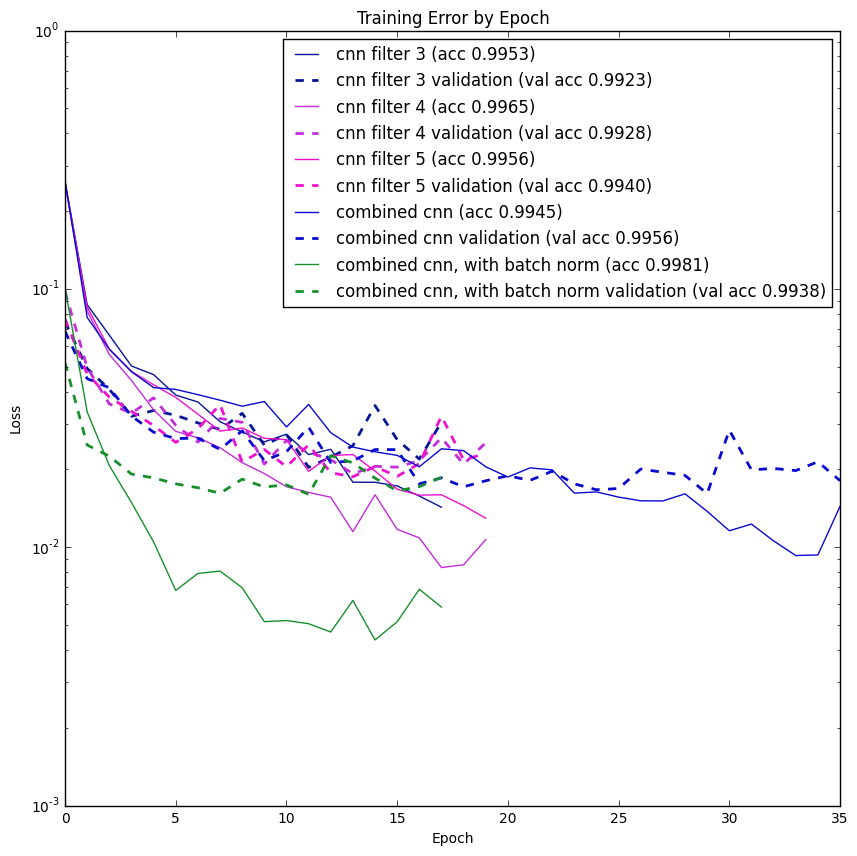

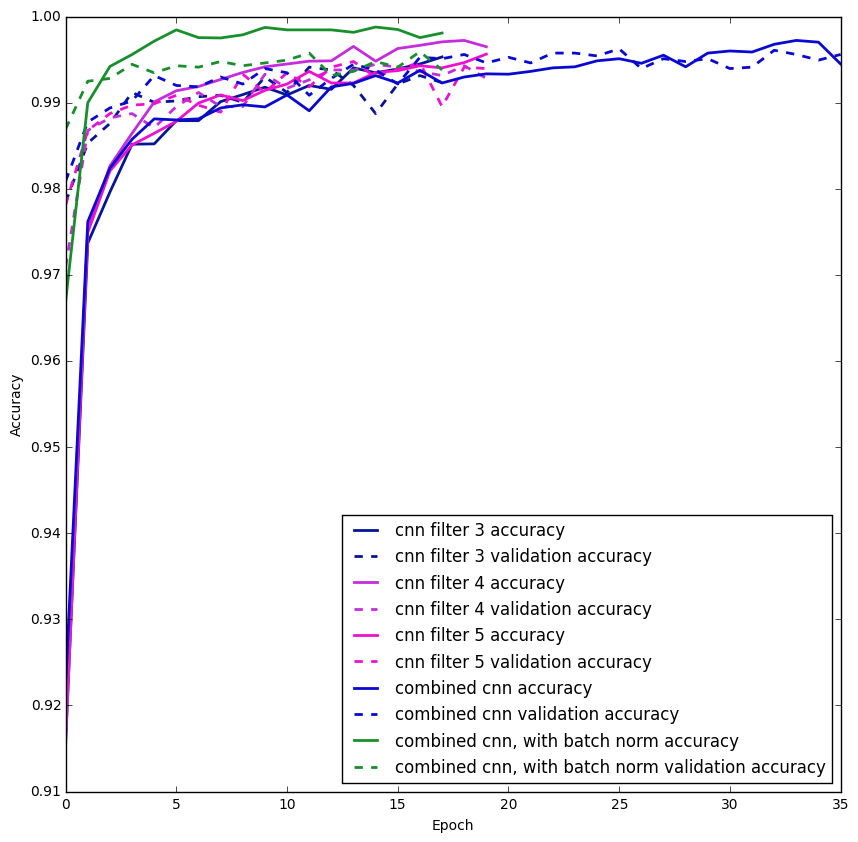

In [71]:
show_losses( [
              #("deep with dropout", hist_deepout),
                ("cnn filter 3", hist_cnn_3),
              ("cnn filter 4", hist_cnn_4),
               ("cnn filter 5", hist_cnn_5),
             ("combined cnn", hist_bcnn),
    ("combined cnn, with batch norm", hist_bbncnn)
            ] )

# Implement a KFold cross validation for a generic model and select the best model

In [72]:
def metrics(m, x,Y):
    return dict(zip(m.metrics_names,m.evaluate( x, Y )))

In [73]:
def significative( s, precision=2 ):
    std = np.std(s)
    digits = 1
    while (std*10**digits)<(10**(precision-1)): digits+=1
    f = "%%0.%df +/- %%0.%df"%(digits,digits)
    return f%( np.mean(s), std)

In [74]:
from sklearn.cross_validation import  KFold
def cross_val(f_m, X, y, nf, batch_size=1000,nb_epoch=4):
    """
    f_m is a fucntion returning a model with fresh random weights
    """
    scores=[]
    for train, test in KFold(n=X.shape[0], n_folds=nf, shuffle=True, random_state=42):
        model = f_m()
        h=model.fit(X[train], y[train],
                    nb_epoch=nb_epoch,
                    batch_size=batch_size,
                    verbose=0,
                    validation_data =(X[test], y[test]),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')]
              )
        epochs = len(h.history['loss'])
        if epochs == nb_epoch: 
            print "Model has not converged"
            return scores
        print len(h.history['loss']),"epochs to convergence"
        m = metrics(model , X[test], y[test])
        scores.append( m['acc'] )
    print "Found accuracy of ",np.mean(scores),"+/-",np.std(scores)
    return scores

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [75]:
def make_simple():
    i = Input((28,28,))
    l = Reshape( (28*28,))(i)
    l = Dense(1000, activation=activation)(l)
    o = Dense(N, init='uniform', activation='softmax')(l)
    simple = Model( i ,o )
    simple.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return simple

In [76]:
s_simple = cross_val(make_simple, train_data, train_target_N, nf=10, nb_epoch=100 )

Epoch 00040: early stopping
41 epochs to convergence
2720/3060 [=========================>....] - ETA: 0sEpoch 00041: early stopping
42 epochs to convergence
2912/3060 [===========================>..] - ETA: 0sEpoch 00037: early stopping
38 epochs to convergence
2752/3060 [=========================>....] - ETA: 0sEpoch 00034: early stopping
35 epochs to convergence
2848/3060 [==========================>...] - ETA: 0sEpoch 00040: early stopping
41 epochs to convergence
2976/3060 [============================>.] - ETA: 0sEpoch 00030: early stopping
31 epochs to convergence
2848/3060 [==========================>...] - ETA: 0sEpoch 00028: early stopping
29 epochs to convergence
2912/3059 [===========================>..] - ETA: 0sEpoch 00038: early stopping
39 epochs to convergence
2912/3059 [===========================>..] - ETA: 0sEpoch 00047: early stopping
48 epochs to convergence
2528/3059 [=======================>......] - ETA: 0sEpoch 00034: early stopping
35 epochs to convergence
27

In [77]:
print "accuracy of %s"%( significative( s_simple ,2))

accuracy of 0.9881 +/- 0.0019


In [78]:
def make_cnn( s ):
    i = Input((28,28,))
    l = Reshape( (28,28,1))(i)
    l = Convolution2D(10, s, s, activation=activation, )(l)
    l = MaxPooling2D()(l)
    l = Flatten()(l)
    l = Dense(1000, activation=activation)(l)
    l = Dropout(0.5)(l)
    o = Dense(N, init='uniform', activation='softmax')(l)
    cnn = Model( i ,o )
    cnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return cnn
def make_cnn_3(): return make_cnn(3)
def make_cnn_4(): return make_cnn(4)
def make_cnn_5(): return make_cnn(5)

In [79]:
s_3 = cross_val(make_cnn_3, train_data, train_target_N, nf=10, nb_epoch=100 )

Epoch 00063: early stopping
64 epochs to convergence
2112/3060 [===================>..........] - ETA: 0sEpoch 00051: early stopping
52 epochs to convergence
2112/3060 [===================>..........] - ETA: 0sEpoch 00072: early stopping
73 epochs to convergence
2944/3060 [===========================>..] - ETA: 0sEpoch 00053: early stopping
54 epochs to convergence
2112/3060 [===================>..........] - ETA: 0sEpoch 00050: early stopping
51 epochs to convergence
2080/3060 [===================>..........] - ETA: 0sEpoch 00050: early stopping
51 epochs to convergence
3008/3060 [============================>.] - ETA: 0sEpoch 00061: early stopping
62 epochs to convergence
3008/3059 [============================>.] - ETA: 0sEpoch 00054: early stopping
55 epochs to convergence
2912/3059 [===========================>..] - ETA: 0sEpoch 00059: early stopping
60 epochs to convergence
2944/3059 [===========================>..] - ETA: 0sEpoch 00061: early stopping
62 epochs to convergence
21

In [80]:
s_4 = cross_val(make_cnn_4, train_data, train_target_N, nf=10, nb_epoch=100 )

Epoch 00050: early stopping
51 epochs to convergence
2112/3060 [===================>..........] - ETA: 0sEpoch 00041: early stopping
42 epochs to convergence
2112/3060 [===================>..........] - ETA: 0sEpoch 00067: early stopping
68 epochs to convergence
2048/3060 [===================>..........] - ETA: 0sEpoch 00060: early stopping
61 epochs to convergence
2720/3060 [=========================>....] - ETA: 0sEpoch 00052: early stopping
53 epochs to convergence
3040/3060 [============================>.] - ETA: 0sEpoch 00037: early stopping
38 epochs to convergence
3060/3060 [==============================] - 0s     
Epoch 00038: early stopping
39 epochs to convergence
3059/3059 [==============================] - 0s     
Epoch 00054: early stopping
55 epochs to convergence
2976/3059 [============================>.] - ETA: 0sEpoch 00065: early stopping
66 epochs to convergence
2912/3059 [===========================>..] - ETA: 0sEpoch 00048: early stopping
49 epochs to convergence


In [81]:
print "accuracy of %s"%( significative( s_3 ,2))
print "accuracy of %s"%( significative( s_4 ,2))

accuracy of 0.9912 +/- 0.0014
accuracy of 0.9912 +/- 0.0011


# Exercise

include batch normalization where it makes sense and compare significance in the change

include L2 normalization in dense models to limit the for the large number of parameters

compare network performance by looking at the evolution of acc with the fraction of train_data used

Explore effect of the batch size on model performance, and training time

In [82]:
evolutions = []
for fract in np.arange(0.5,1,0.1):
    indexing = np.asarray(range(train_data.shape[0]))
    np.random.shuffle( indexing )
    indexing = indexing[:int(fract*len(indexing))]
    evolutions.append( cross_val(make_cnn_3, train_data[indexing], train_target_N[indexing], nf=5, nb_epoch=100 ) )
    print "accuracy of %s"%( significative( evolutions[-1] ,2))

Epoch 00067: early stopping
68 epochs to convergence
3008/3060 [============================>.] - ETA: 0sEpoch 00078: early stopping
79 epochs to convergence
2688/3060 [=========================>....] - ETA: 0sEpoch 00074: early stopping
75 epochs to convergence
2656/3060 [=========================>....] - ETA: 0sEpoch 00070: early stopping
71 epochs to convergence
2912/3059 [===========================>..] - ETA: 0sEpoch 00069: early stopping
70 epochs to convergence
2816/3059 [==========================>...] - ETA: 0sFound accuracy of  0.986534067463 +/- 0.00294105508024
accuracy of 0.9865 +/- 0.0029
Epoch 00076: early stopping
77 epochs to convergence
2784/3672 [=====================>........] - ETA: 0sEpoch 00062: early stopping
63 epochs to convergence
2912/3672 [======================>.......] - ETA: 0sEpoch 00075: early stopping
76 epochs to convergence
2816/3671 [======================>.......] - ETA: 0sEpoch 00087: early stopping
88 epochs to convergence
2784/3671 [===========

Implement a running average earlystopping class for keras